In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# 定义处理图像的函数
def process_image(image_path):
    # 读取图像
    image = cv.imread(image_path)
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

    # 应用高斯模糊
    gray_blurred = cv.GaussianBlur(gray, (15, 15), 0)

    # 检测圆形物体
    circles = cv.HoughCircles(
        gray_blurred,
        cv.HOUGH_GRADIENT,
        dp=1.2,  # 分辨率参数
        minDist=30,  # 圆心之间的最小距离
        param1=100,  # Canny边缘检测的阈值
        param2=30,   # 检测圆的阈值，较低的值意味着检测到的圆更可能是实际的圆
        minRadius=20,  # 圆的最小半径
        maxRadius=100  # 圆的最大半径
    )

    # 防止圆重叠的函数
    def remove_overlapping_circles(circles, min_dist):
        filtered_circles = []
        for i, (x1, y1, r1) in enumerate(circles):
            overlapping = False
            for j, (x2, y2, r2) in enumerate(filtered_circles):
                distance = np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)
                if distance < min_dist:
                    overlapping = True
                    break
            if not overlapping:
                filtered_circles.append((x1, y1, r1))
        return filtered_circles

    # 如果检测到圆
    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        circles = remove_overlapping_circles(circles, min_dist=50)

        # 在图像中绘制圆
        for (x, y, r) in circles:
            cv.circle(image, (x, y), r, (0, 255, 0), 4)
            cv.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

        return image, len(circles)
    else:
        return image, 0


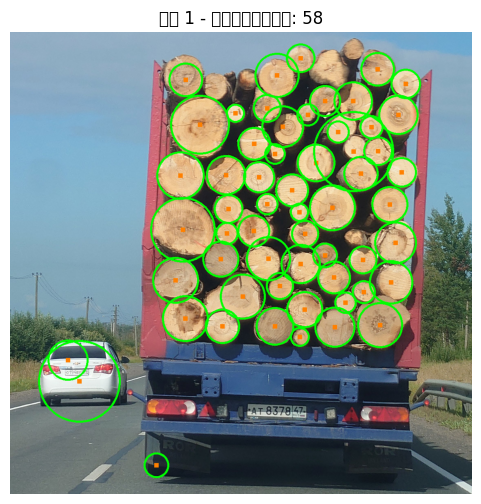

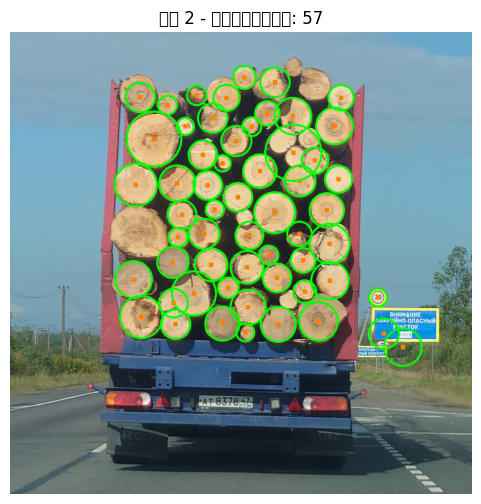

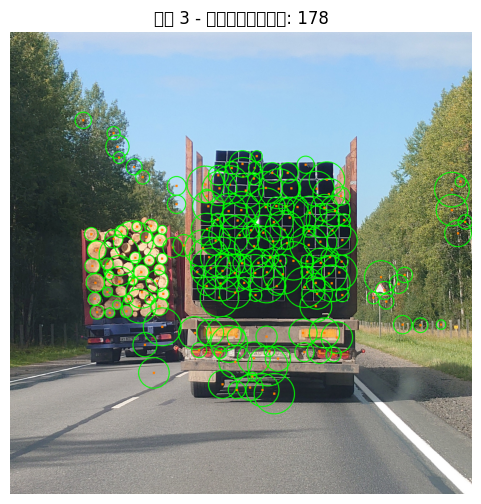

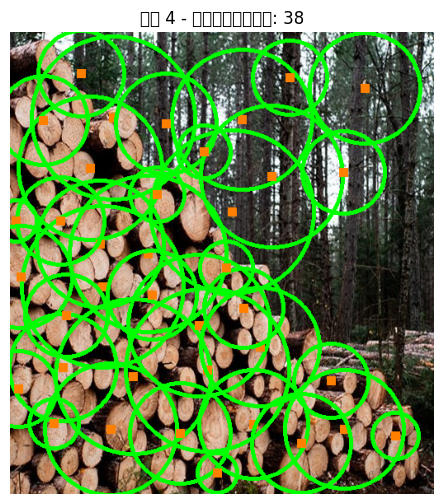

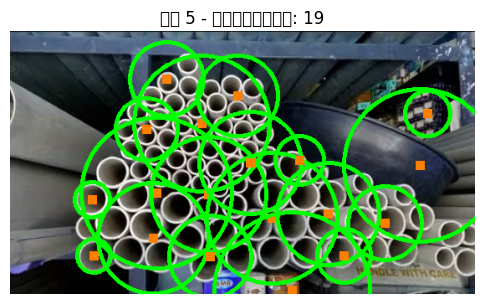

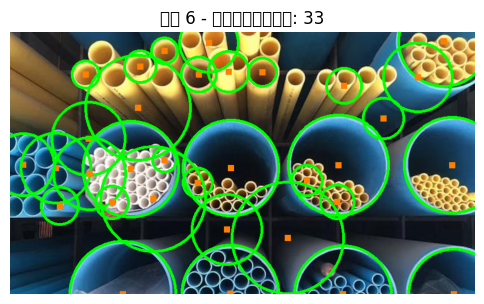

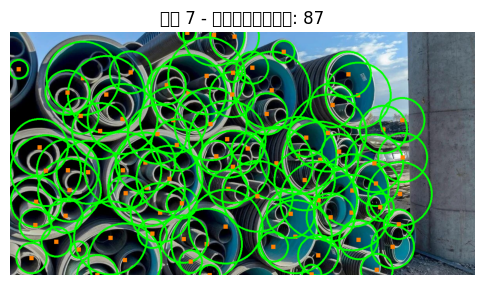

In [29]:
import glob

# 获取图片文件路径
image_paths = glob.glob('*.jpg') 

# 逐张处理并显示图片
for i, image_path in enumerate(image_paths):
    processed_image, count = process_image(image_path)

    # 显示图像和计数
    plt.figure(figsize=(6, 6))
    plt.imshow(cv.cvtColor(processed_image, cv.COLOR_BGR2RGB))
    plt.title(f"图像 {i+1} - 检测到的木材数量: {count}")
    plt.axis('off')
    plt.show()
